### Imports and loading data (Kilian)

In [1]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [55]:
dataset_1 = pd.read_csv("dataset_1.csv")

### data manipulation (Kilian)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

In [56]:
dataset_1 = dataset_1[['Negative_Review', 'Positive_Review', 'Reviewer_Score']]

dataset_1[['Negative_Review']] = dataset_1[['Negative_Review']].replace(to_replace="No Negative", value="")

dataset_1[['Positive_Review']] = dataset_1[['Positive_Review']].replace(to_replace="No Positive", value="")

dataset_1["Review_Text"] = dataset_1['Negative_Review'] + " " + dataset_1['Positive_Review']

dataset_1 = dataset_1.drop(columns=['Negative_Review', 'Positive_Review'])

dataset_1['Review_Text'] = dataset_1['Review_Text'].apply(lambda x: x.lower())

def remove_numbers(text):
    text = ''.join(word for word in text if not word.isdigit())
    return text

dataset_1['Review_Text'] = dataset_1['Review_Text'].apply(remove_numbers)

for punctuation in string.punctuation:
    dataset_1['Review_Text'] = dataset_1['Review_Text'].replace(punctuation, '') 
    
def custom_stopwords():
    """create custom stopwords list excluding negative words"""
    negative_words = ['no',
    'nor',
    'not',
    "don't",
    'should',
    "should've",
    'aren',
    "aren't",
    'couldn',
    "couldn't",
    'didn',
    "didn't",
    'doesn',
    "doesn't",
    'hadn',
    "hadn't",
    'hasn',
    "hasn't",
    'haven',
    "haven't",
    'isn',
    "isn't",
    "wasn't",
    'weren',
    "weren't",
    'won',
    "won't",
    'wouldn',
    "wouldn't"]
    custom_stopwords = [x for x in stopwords.words('english') if x not in negative_words]
    return custom_stopwords

custom_stopwords = custom_stopwords()

stop_words = custom_stopwords
dataset_1['reviews'] = dataset_1['Review_Text'].map(word_tokenize)
dataset_1['reviews'] = dataset_1['reviews'].map(lambda x: [w for w in x if not w in stop_words])

lemmatizer = WordNetLemmatizer()

def lemmatizing(text):
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    text = lemmatized
    text = ' '.join(word for word in text)
    return text

dataset_1['reviews'] = dataset_1['reviews'].apply(lemmatizing)

dataset_1['review_score'] = dataset_1['Reviewer_Score'] # / 10

dataset_1 = dataset_1.drop(columns=['Review_Text', 'Reviewer_Score'])

dataset_1['review_score'] = dataset_1['review_score'].round(decimals=2)

#Final check
dataset_1

### Exporting to csv

In [14]:
#dataset_1.to_csv('../raw_data/clean_dataset_1.csv')

------------------------------------- NEW FILE --------------------------

In [68]:
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize

# Import CSV

In [69]:
#data = pd.read_csv("../raw_data/clean_dataset_1.csv", index_col=0)
data = dataset_1
data

,reviews,review_score
0,angry made post available via possible site us...,2.9
1,no real complaint hotel great great location s...,7.5
2,room nice elderly bit difficult room two story...,7.1
3,room dirty afraid walk barefoot floor looked n...,3.8
4,booked company line showed picture room though...,6.7
...,...,...
515733,no trolly staff help take luggage room location,7.0
515734,hotel look like surely not breakfast ok got ea...,5.8
515735,ac useless hot week vienna gave hot air,2.5
515736,room enormous really comfortable believe famil...,8.8


# Remove less than 6 words

In [70]:
data['length'] = data['reviews'].apply(lambda x: len(word_tokenize(str(x))))
data.drop(data[data['length'] < 6].index, inplace=True)
data.drop(columns=['length'], inplace=True)
data.reset_index(drop=True, inplace=True)
data

,reviews,review_score
0,angry made post available via possible site us...,2.9
1,no real complaint hotel great great location s...,7.5
2,room nice elderly bit difficult room two story...,7.1
3,room dirty afraid walk barefoot floor looked n...,3.8
4,booked company line showed picture room though...,6.7
...,...,...
306040,noisy night air causing loud banging heating p...,6.3
306041,put fotos cinde room see booking location give...,5.4
306042,wifi location no tea coffee room rather cheap ...,5.8
306043,breakfast excelent lot fress fruit hotel good ...,10.0


# NEURAL NETWORK 1 - gensim.models - Word2Vec

In [329]:
X_1 = data['reviews'][:10000]
y_1 = data['review_score'][:10000]
X_1.shape, y_1.shape
y = data['review_score'][:10000]

((10000,), (10000,))

In [326]:
# Tokenize X
import nltk
from nltk.tokenize import word_tokenize

def tokenize_words(text):
    # Tokenizing
    text_tokenized = word_tokenize(text)
    text = [word for word in text_tokenized] # if not word in stop_words]
#     text = ' '.join([word for word in text])
    return text

In [330]:
# Tokenize X
X_1 = [tokenize_words(X_1[row]) for row in range(0, len(X_1))]

In [333]:
# We need Padding
len(X_1[0]),len(X_1[1]),len(X_1[2]),len(X_1[3]),len(X_1[4])

(182, 64, 34, 122, 64)

In [338]:
from gensim.models import Word2Vec

word2vec = Word2Vec(sentences=X_1, min_count=3, window=10)
len(word2vec.wv.vocab)

4658

In [339]:
import numpy as np
### YOUR CODE HERE - Step #3
def embed_sentence(word2vec, sentence):
    ### YOUR CODE HERE
    sentence_vectors = []
    for word in sentence:
        if word in word2vec.wv:
            sentence_vectors.append(word2vec.wv[word])            

    return np.array(sentence_vectors)

In [340]:
def embedding(word2vec, sentences):
    sentences_vectors = [embed_sentence(word2vec, sentence) for sentence in sentences]
    return sentences_vectors

In [341]:
X_1 = embedding(word2vec, X_1)

In [343]:
# We need Padding
len(X_1[0]),len(X_1[1]),len(X_1[2]),len(X_1[3]),len(X_1[4])

(171, 63, 34, 117, 58)

In [344]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_pad = pad_sequences(X_1, dtype='float32', padding='post')

In [346]:
len(X_pad[0]),len(X_pad[1]),len(X_pad[2]),len(X_pad[3]),len(X_pad[4])

(244, 244, 244, 244, 244)

In [345]:
X_pad.shape

(10000, 244, 100)

### HOLD OUT

In [347]:
from sklearn.model_selection import train_test_split

# Hold out 
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2)

#check
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 244, 100), (2000, 244, 100), (8000,), (2000,))

####  NEURAL NETWORK

In [374]:
from sklearn.model_selection import cross_validate
from tensorflow.keras import layers
from tensorflow.keras import models

def initialize_model():
    ### Model architecture
    model_gensim = models.Sequential()
    
    ### Model MASK
    model_gensim.add(layers.Masking(input_shape=(244, 100)))                                     
    
    ### First convolution & max-pooling
    model_gensim.add(layers.LSTM(units=100, activation='tanh'))   #244 or 100 ??
    model_gensim.add(layers.Dense(50, activation='relu'))
    model_gensim.add(layers.Dense(20, activation='relu'))
    model_gensim.add(layers.Dense(20, activation='relu'))
    model_gensim.add(layers.Dense(20, activation='relu'))
   
    ### Last layer (let's say a classification with 10 output)
    model_gensim.add(layers.Dense(1, activation='linear'))
        
    ### Model compilation
    model_gensim.compile(loss='mse', 
                  optimizer='rmsprop',  
                  metrics=['mae'])     

    return model_gensim

In [375]:
model_gensim = initialize_model()
model_gensim.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_8 (Masking)          (None, 244, 100)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_103 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_104 (Dense)            (None, 20)                1020      
_________________________________________________________________
dense_105 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_106 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_107 (Dense)            (None, 1)               

In [380]:
### YOUR CODE HERE

from tensorflow.keras.callbacks import EarlyStopping 

# YOUR CODE HERE
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)
model_gensim = initialize_model()

history = model_gensim.fit(X_train, y_train,
          validation_split=0.2,
          batch_size=32,
          epochs=100,
          verbose=1,
          callbacks=[es])

Epoch 1/100
200/200 [==============================] - 102s 456ms/step - loss: 15.1494 - mae: 2.7353 - val_loss: 2.0722 - val_mae: 1.0851
Epoch 2/100
200/200 [==============================] - 80s 399ms/step - loss: 2.1608 - mae: 1.1322 - val_loss: 1.8717 - val_mae: 1.0660
Epoch 3/100
200/200 [==============================] - 69s 346ms/step - loss: 1.9647 - mae: 1.0631 - val_loss: 1.9163 - val_mae: 1.0398
Epoch 4/100
200/200 [==============================] - 72s 359ms/step - loss: 1.7898 - mae: 1.0200 - val_loss: 1.8363 - val_mae: 1.0890
Epoch 5/100
200/200 [==============================] - 74s 368ms/step - loss: 1.7375 - mae: 1.0118 - val_loss: 2.1730 - val_mae: 1.1329
Epoch 6/100
200/200 [==============================] - 88s 438ms/step - loss: 1.6992 - mae: 0.9860 - val_loss: 1.8105 - val_mae: 1.0021
Epoch 7/100
200/200 [==============================] - 72s 363ms/step - loss: 1.6967 - mae: 0.9901 - val_loss: 1.6749 - val_mae: 0.9982
Epoch 8/100
200/200 [=========================

In [ ]:
# history.history

In [384]:
model_gensim.evaluate(X_test, y_test, verbose=0)

[1.5848098993301392, 0.9432970285415649]

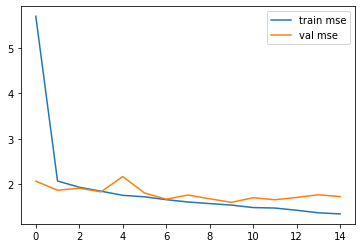

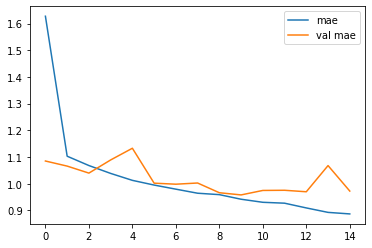

In [385]:
plt.plot(history.history['loss'], label='train mse')      #CHANGE
plt.plot(history.history['val_loss'], label='val mse')      #CHANGE
plt.legend()
plt.show()
plt.plot(history.history['mae'], label='mae')      #CHANGE
plt.plot(history.history['val_mae'], label='val mae')
plt.legend()
plt.show()

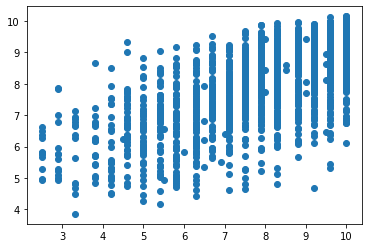

In [386]:
import matplotlib.pyplot as plt 
y_pred = model_gensim.predict(X_test)
plt.scatter(y_test, y_pred)

# NEURAL NETWORK 2 - gensim.models - Word2Vec (vectorizing inside the network)

In [410]:
X_2 = data['reviews'][:10000]
y_2 = data['review_score'][:10000]
X_2.shape, y_2.shape
y = data['review_score'][:10000]

((10000,), (10000,))

In [395]:
# # Tokenize X
# import nltk
# from nltk.tokenize import word_tokenize

# def tokenize_words(text):
#     # Tokenizing
#     text_tokenized = word_tokenize(text)
#     text = [word for word in text_tokenized] # if not word in stop_words]
# #     text = ' '.join([word for word in text])
#     return text

In [411]:
# Tokenize X
# X_2 = [tokenize_words(X_2[row]) for row in range(0, len(X_2))]

from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 10000

def tokenInit(train, max_words):
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(train)
    return tokenizer

In [412]:
tokenizer = tokenInit(X_2, max_words)

In [419]:
# tokenizer.word_index

In [420]:
sequences = tokenizer.texts_to_sequences(X_2)

In [423]:
# sequences[0]

In [424]:
# We need Padding
len(sequences[0]),len(sequences[1]),len(sequences[2]),len(sequences[3]),len(sequences[4])

(182, 64, 34, 122, 64)

In [426]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_pad = pad_sequences(sequences, dtype='int32', padding='post') # Removed: dtype='float32',

In [427]:
X_pad.shape

(10000, 254)

 ### Hold out

In [428]:
from sklearn.model_selection import train_test_split

# Hold out 
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2)

#check
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 254), (2000, 254), (8000,), (2000,))

In [430]:
X_train[0]

array([  51,   50, 1107,  163, 1678,  247, 1082,  509,  270, 1707,  348,
          1,    1,  140,  301,   51,  347,   25,  183,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

####  NEURAL NETWORK

In [436]:
from sklearn.model_selection import cross_validate
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import Sequential

def initialize_model():
    ### Model architecture
    model_gensim_2 = models.Sequential()
    
    ### Model MASK
#     model_gensim_2.add(layers.Masking(input_shape=(244, 100)))          # NOT NEEDED ??                          
    
    ### Embedding Padded
    model_gensim_2.add(layers.Embedding(input_dim=10000, output_dim=100, mask_zero=True))
    
    ### Embedding
#     model_gensim_2.add(layers.Embedding(input_dim=2000, output_dim=30))   # HOW MANY ?
        
    ### First convolution & max-pooling
    model_gensim_2.add(layers.LSTM(units=100, activation='tanh'))   #244 or 100 ??
    model_gensim_2.add(layers.Dense(50, activation='relu'))
    model_gensim_2.add(layers.Dense(20, activation='relu'))
    model_gensim_2.add(layers.Dense(20, activation='relu'))
   
    ### Last layer (let's say a classification with 10 output)
    model_gensim_2.add(layers.Dense(1, activation='linear'))
        
    ### Model compilation
    model_gensim_2.compile(loss='mse', 
                  optimizer='rmsprop',  
                  metrics=['mae'])     

    return model_gensim_2

In [437]:
model_gensim_2 = initialize_model()
model_gensim_2.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_121 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_122 (Dense)            (None, 20)                1020      
_________________________________________________________________
dense_123 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 21        
Total params: 1,086,911
Trainable params: 1,086,911
Non-trainable params: 0
___________________________________________

In [438]:
### YOUR CODE HERE

from tensorflow.keras.callbacks import EarlyStopping 

# YOUR CODE HERE
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)
model_gensim = initialize_model()

history = model_gensim_2.fit(X_train, y_train,
          validation_split=0.2,
          batch_size=32,
          epochs=100,
          verbose=1,
          callbacks=[es])

Epoch 1/100
200/200 [==============================] - 159s 732ms/step - loss: 11.4514 - mae: 2.3656 - val_loss: 2.8964 - val_mae: 1.3345
Epoch 2/100
200/200 [==============================] - 121s 605ms/step - loss: 2.9552 - mae: 1.3793 - val_loss: 3.3677 - val_mae: 1.5667
Epoch 3/100
200/200 [==============================] - 101s 505ms/step - loss: 2.1030 - mae: 1.1235 - val_loss: 2.0623 - val_mae: 1.1878
Epoch 4/100
200/200 [==============================] - 84s 419ms/step - loss: 1.4699 - mae: 0.9300 - val_loss: 1.7667 - val_mae: 1.0586
Epoch 5/100
200/200 [==============================] - 84s 419ms/step - loss: 1.1646 - mae: 0.8248 - val_loss: 1.4745 - val_mae: 0.9467
Epoch 6/100
200/200 [==============================] - 86s 430ms/step - loss: 0.9773 - mae: 0.7362 - val_loss: 1.4385 - val_mae: 0.9288
Epoch 7/100
200/200 [==============================] - 106s 530ms/step - loss: 0.8471 - mae: 0.6940 - val_loss: 1.4093 - val_mae: 0.8866
Epoch 8/100
200/200 [======================

In [ ]:
# history.history

In [439]:
model_gensim_2.evaluate(X_test, y_test, verbose=0)

[1.4718115329742432, 0.9139989614486694]

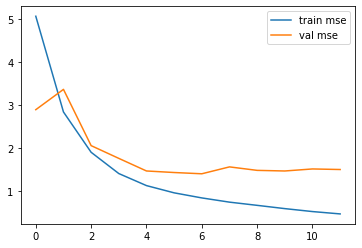

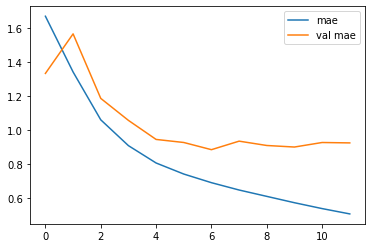

In [440]:
plt.plot(history.history['loss'], label='train mse')      #CHANGE
plt.plot(history.history['val_loss'], label='val mse')      #CHANGE
plt.legend()
plt.show()
plt.plot(history.history['mae'], label='mae')      #CHANGE
plt.plot(history.history['val_mae'], label='val mae')
plt.legend()
plt.show()

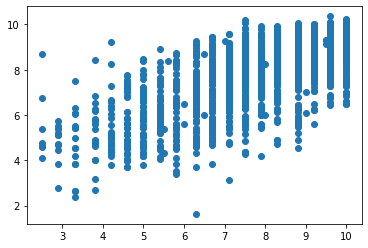

In [441]:
import matplotlib.pyplot as plt 
y_pred = model_gensim_2.predict(X_test)
plt.scatter(y_test, y_pred)

# Export

In [ ]:
# import pickle

# # Export pipeline as pickle file
# with open("pipeline.pkl", "wb") as file:
#     pickle.dump(best_pipeline, file)